# CAP 4630 - Intro to AI
## Assignment 4
## Flower classification using machine learning techniques
## Jonathan Masino(Reporter), Ava Perrone(Developer), and Steven Fernandez(Architect)
#jmasino2019   perronea2020    stevenfernan2020
This is a simple example of a 3-class classifier using the Fisher's Iris dataset.


Useful references and sources:

- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://www.kaggle.com/uciml/iris
- http://archive.ics.uci.edu/ml/datasets/Iris/
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html 
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### (OPTIONAL) TODO 1

Add your own sources and references here.

## Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

## Part 1. Load the data

The first step is to load the necessary data. 

Use the command `read_csv` from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. 

The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [ ]:
# load the data
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Part 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. 

The `describe()` method is a good starting point. The `describe()` method prints statistics of the dataset, like mean, standard deviation, etc.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. 

### TODO 2

Write code to generate a pair plot for the Iris dataset.

FileNotFoundError: ignored

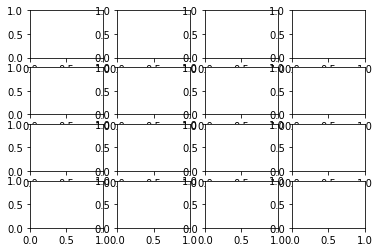

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(4, 4)
def plotting(sl, sw, pl, pw, color):
    axs[0, 0].scatter(sl, sl, color = color)
    axs[0, 1].scatter(sw, sl, color = color)
    axs[0, 2].scatter(pl, sl, color = color)
    axs[0, 3].scatter(pw, sl, color = color)
    axs[1, 0].scatter(sl, sw, color = color)
    axs[1, 1].scatter(sw, sw, color = color)
    axs[1, 2].scatter(pl, sw, color = color)
    axs[1, 3].scatter(pw, sw, color = color)
    axs[2, 0].scatter(sl, pl, color = color)
    axs[2, 1].scatter(sw, pl, color = color)
    axs[2, 2].scatter(pl, pl, color = color)
    axs[2, 3].scatter(pw, pl, color = color)
    axs[3, 0].scatter(sl, pw, color = color)
    axs[3, 1].scatter(sw, pw, color = color)
    axs[3, 2].scatter(pl, pw, color = color)
    axs[3, 3].scatter(pw, pw, color = color)

def averaging(species):
    sLen = 0
    sWid = 0
    pLen = 0
    pWid = 0
    counter = 0
    if species == "Iris-setosa":
        color  = "red"
    elif species == "Iris-versicolor":
        color  = "green"
    else:
        color  = "blue"
    for lineList in reader:
        if lineList[4] == species:
            sL = float(lineList[0])
            sW = float(lineList[1])
            pL = float(lineList[2])
            pW = float(lineList[3])  
            sLen += float(lineList[0])
            sWid += float(lineList[1])
            pLen += float(lineList[2])
            pWid += float(lineList[3])  
            plotting(sL,sW, pL, pW, color)
            counter += 1
        if counter == 49:
            break
    species = {"Species": species,"Sepal Length":sLen/counter, "Sepal Width":sWid/counter, "Petal Length":pLen/counter, "Petal Width":pWid/counter}        
    return(species)
def printing(setosa, verzicolor, virginica):
    print("---------------------------------------------------------------------")
    print("Species: %26s%18s%15s" % ("Setosa", "Versicolor", "Virginica"))
    print("---------------------------------------------------------------------")
    print("Attributes (cm):")
    print("\n  Average Petal Length: %10.2f%16.2f%15.2f" % (setosa["Petal Length"], versicolor["Petal Length"], virginica["Petal Length"]))
    print("\n  Average Petal Width: %11.2f%16.2f%15.2f" % (setosa["Petal Width"], versicolor["Petal Width"], virginica["Petal Width"]))
    print("\n  Average Sepal Length: %10.2f%16.2f%15.2f" % (setosa["Sepal Length"], versicolor["Sepal Length"], virginica["Sepal Length"]))
    print("\n  Average Sepal Width: %11.2f%16.2f%15.2f" % (setosa["Sepal Width"], versicolor["Sepal Width"], virginica["Sepal Width"]))

import csv
# load the data
file = open("iris.data", "r")
reader = csv.reader(file)
next(reader)
print("This program reads the information from a file and finds the average. \nThen it prints the results to the screen.\n")
setosa = averaging("Iris-setosa")
versicolor = averaging("Iris-versicolor") 
virginica = averaging("Iris-virginica")
printing(setosa, versicolor, virginica)
file.close()

In [ ]:
plotting

## Part 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm. 

In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. 

In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

In [ ]:
iris['class'].unique()

In [ ]:
iris['class_encod'] = iris['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
iris['class_encod'].unique()

In [ ]:
y = iris[['class_encod']] # target attributes 
X = iris.iloc[:, 0:4] # input attributes
X.head()

In [ ]:
y.head()

### TODO 3
Write code to normalize the features of the iris dataset so that all attributes fit within the [0..1] range.

In [ ]:
# Steven Fernandez
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

X = pd.DataFrame(X_scaled)

X.describe() # Comment out this line to check your results against the screenshot in the guidelines.

## Part 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens. 

The method `train_test_split()` will split the `X` and `y` dataframes in training data and test data.


In [ ]:
import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

### 4.1 K-nearest-neighbors (KNN) classifier

Let's use `X_train` and `y_train` to build a KNN classifier, using the `KNeighborsClassifier` class provided by scikit-learn. 

Because the machine learning algorithm is already implemented by the library, all we have to do is call the method `fit()` passing the `X_train` and `y_train` datasets as arguments.

In [ ]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

Once the model is built, we can use the `predict()` method to calculate the predicted category of a instance. 

In this case, we want to predict the class of the first 10 lines of the `X_test` dataset. The return is an array containing the estimated categories.

In [ ]:
m.predict(X_test.iloc[0:10])

In [ ]:
y_test[0:10]

We can use methods like `score()` and `confusion_matrix()` to measure the performance of our model. 

We see that the accuracy of our model is very close to 100%, which means that the model predicted correctly almost all cases of the test dataset. 

In [ ]:
m.score(X_test, y_test)

A confusion matrix shows where the errors occurred, i.e., which classes were misclassified. 

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 display_labels=iris['class'].unique(),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### Save the model for later use

We might want to save our model for later use. 

For example, we could embed our model into a webservice or mobile application. So we use the method `dump()` from the joblib package to save the model to a file.

In [ ]:
dump(m, 'iris-classifier.dmp')

In [ ]:
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

### 4.2 Decision tree classifier


### TODO 4

Write code to build a decision tree classifier, using the `DecisionTreeClassifier` class provided by scikit-learn. 

Similarly to 4.1 above, your code should build, train, and test the classifier, compute its accuracy, display the confusion matrices, save the model to a file for later use, load it from file and confirm that it's working.


In [ ]:
#Jonathan Masino    jmasino2019
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

import random
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

m = DecisionTreeClassifier()
m.fit(X_train, np.ravel(y_train))
m.predict(X_test[0:10])
y_test[0:10]
m.score(X_test, y_test)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(m, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()
dump(m, 'iris-classifier.dmp')
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

## CONCLUSION

### LESSONS LEARNED


REPORTER: Jonathan Masino
- This assignment did not take us very long.
- Ava did part 2, she had some errors that I was able to fix for her
- Steven did part 3, he had no issues and was able to complete quickly
- I did part 4, I had some issues importing the DecisionTreeClassifier   class but was quickly able to resolve it.
- I only had to make 1 very small adjustment in the code; I had to remove display_labels=iris['class'].unique() from the for loop. 'class' was giving me an error and I did not know how to fix it.
- We split the work up pretty evenly and got this assingment done in a timely mannor.